# TASK 6 Prediction using Decision Tree  Algorithm

## BY : D.GIRISH

### Question : 
###    *Create the Decision Tree classifier and visualize it graphically.
###    *The purpose is if we feed any new data to this classifier, it would be able to predict the right class   accordingly.

In [345]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [346]:
#Loaading the dataset
iris = pd.read_csv("iris.csv")

In [347]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [348]:
iris.drop(["Id"],axis = 1,inplace = True)

In [350]:
iris.shape

(150, 5)

In [351]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [352]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [353]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Removing Outliers 

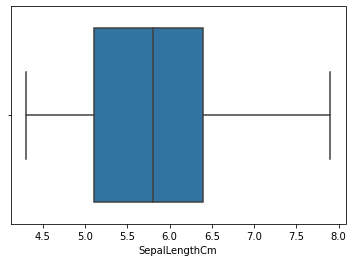

In [354]:
sns.boxplot(iris["SepalLengthCm"])

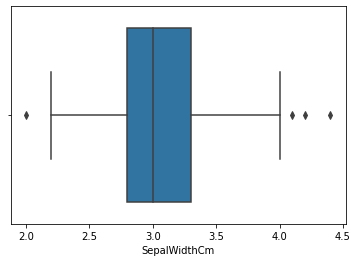

In [355]:
sns.boxplot(iris["SepalWidthCm"])

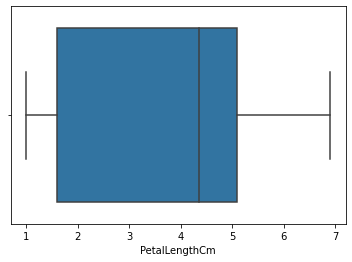

In [356]:
sns.boxplot(iris["PetalLengthCm"])

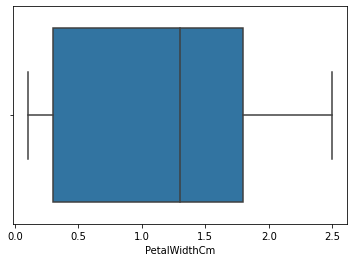

In [357]:
sns.boxplot(iris["PetalWidthCm"])

In [358]:
Q1 = iris.quantile(0.25)
Q3 = iris.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
iris = iris[~((iris < (Q1-1.5 * IQR)) |(iris > (Q3 + 1.5 * IQR))).any(axis=1)]
iris.shape

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


(146, 5)

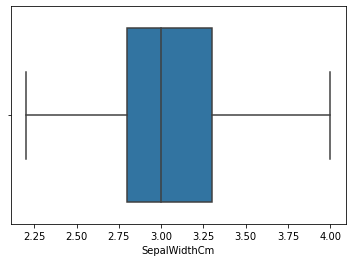

In [359]:
sns.boxplot(iris["SepalWidthCm"])

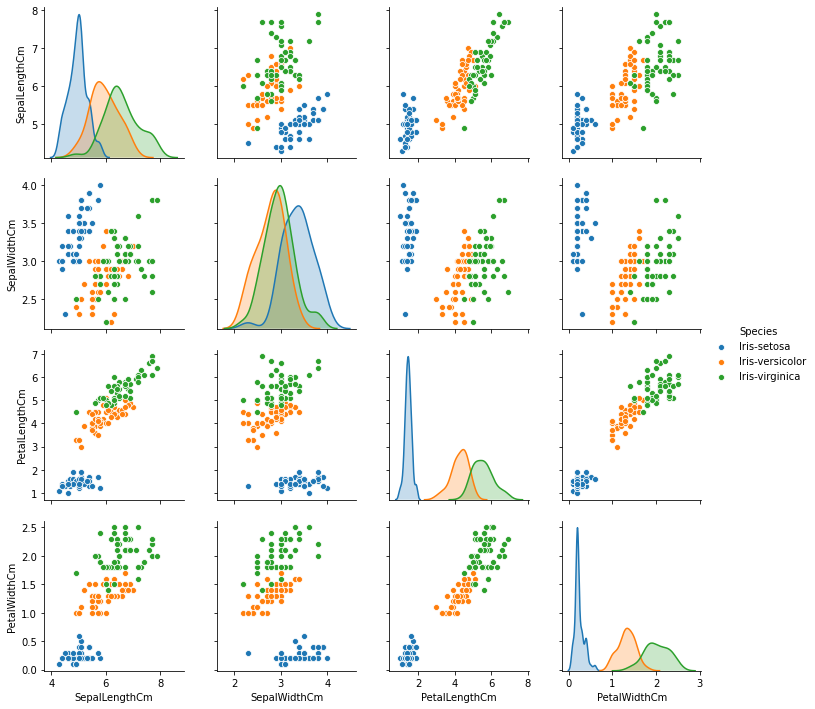

In [360]:
sns.pairplot(iris, hue = "Species")

In [361]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.113977,0.879374,0.822577
SepalWidthCm,-0.113977,1.000000,-0.397123,-0.329782
PetalLengthCm,0.879374,-0.397123,1.000000,0.961755
PetalWidthCm,0.822577,-0.329782,0.961755,1.000000


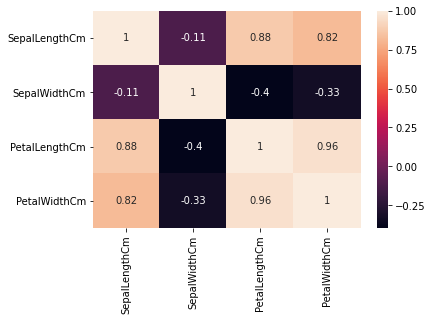

In [362]:
sns.heatmap(iris.corr(),annot = True)

In [363]:
x = iris.drop("Species",axis = 1)

In [364]:
y = iris.Species

In [365]:
x.shape,y.shape

((146, 4), (146,))

In [366]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 5)

In [367]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((109, 4), (109,), (37, 4), (37,))

In [368]:
dtree = DecisionTreeClassifier(criterion = "entropy",random_state =50)

In [369]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=50, splitter='best')

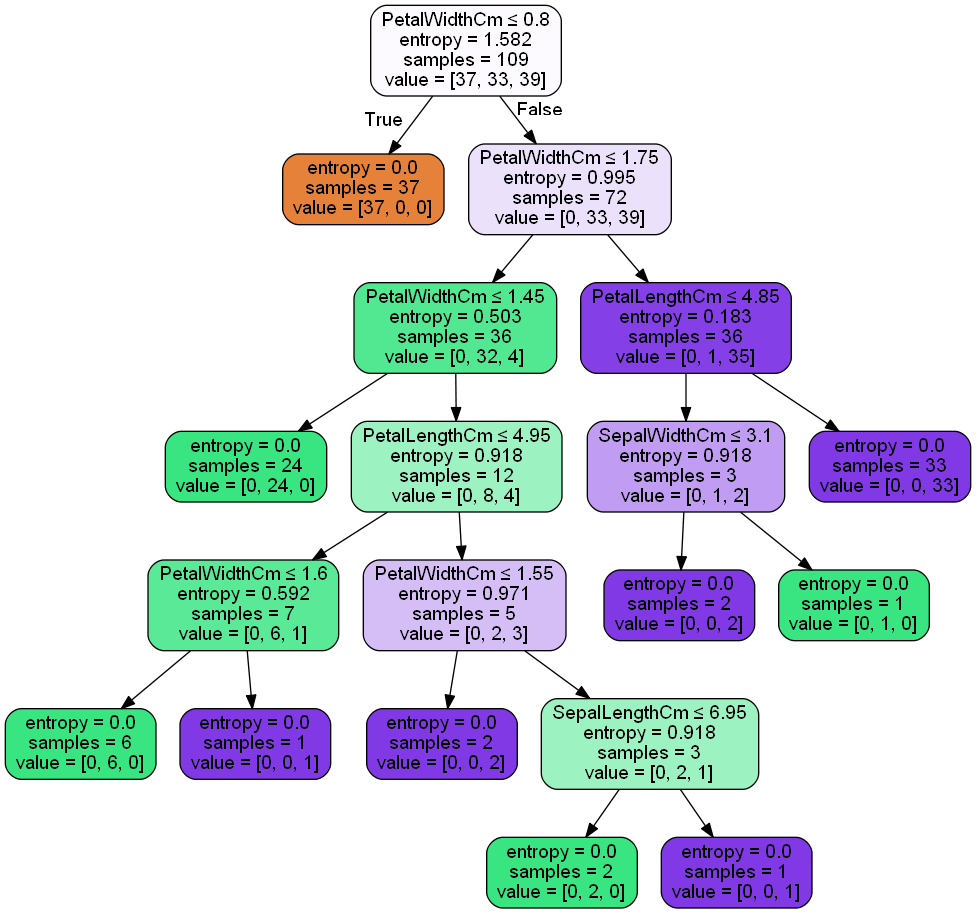

In [370]:
# Visualize the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=x.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [371]:
pred_train = dtree.predict(x_train)
pred_test = dtree.predict(x_test)

In [372]:
pred_test

array(['Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [373]:
confusion_matrix(y_test,pred_test)

array([[10,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 10]], dtype=int64)

In [375]:
print("train Accuracy",accuracy_score(y_train,pred_train))
print("test Accuracy",accuracy_score(y_test,pred_test))

train Accuracy 1.0
test Accuracy 0.972972972972973


### The model is a generalized model and its 97.3% accurate